# Homework 4 - Neural Networks - Ujwal Joshi

### Problem statement and Datasets
- Your task for this homework will be to construct a neural network for both a regression
and classification task. We'll be using the california dataset for the regression portion,
and iris for classification. By the end of this hw you should be comfortable using sklearn'sneural network on a dataset.
- The data we'll be using for this hw will come directly from sklearn. Sklearn has built in
datasets that we can download by running a single command. 
- Datasets: 2 dataset
   - California housing dataset
   - Iris dataset
      - sepal length (cm)
      - sepal width (cm)
      - petal length (cm)
      - petal width (cm)

### California Housing Dataset
- Attributes
   - MedInc
   - HouseAge
   - AveRooms
   - AveBedrms
   - Population
   - AveOccup
   - Latitude
   - Longitude

### Part 1 Reading and Understanding the Data (Regression Part)
- Import `fetch_california_housing` from sklearn. We then proceed to saving this data into data frame (X), and our target/labels in a variable (y). Use these variables (X data frame
and y) for the regression portion of this homework.
- TODO:
   - Print some basic statistics of your data.
   - Print some general information about your data using pandas.
   - By looking at our previous output, are there any missing values in this dataset? How do we know?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing dataset and storing data and target into X and y data frames.

In [2]:
from sklearn.datasets import fetch_california_housing

housing_sk = fetch_california_housing()

X = pd.DataFrame(housing_sk.data, columns=housing_sk.feature_names)
y = pd.DataFrame(housing_sk.target, columns=['HouseValue'])

df = pd.concat([X, y], axis=1)

In [14]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
y.head()

,HouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [16]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [18]:
y.describe()

,HouseValue
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [19]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseValue  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [24]:
print(f'X (data) has {X.isnull().sum().sum()} missing or null values')
print(f'y (target) has {y.isnull().sum().sum()} missing or null values')

X (data) has 0 missing or null values
y (target) has 0 missing or null values


**answer:** Based on the previous outputs we can conclude that there are no missing values in this dataset based on the outputs of the `info` and `isnull` functions.

### Part 2 Visualization
Create a histogram of the median house value (y)

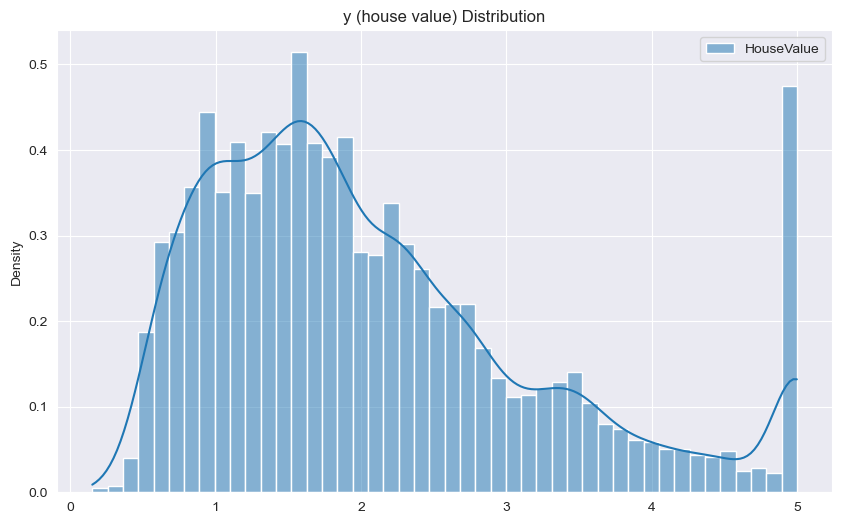

In [73]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=y, stat="density", kde=True)
plt.title('y (house value) Distribution')
plt.show()

What can you conclude from the plot you created?  
**answer:** We can conlude that the distribution of the target is right skewed meaning the average is greater than the overall median, we can also see that a median house value near 5 seems to be an outlier in the data.

Create a scatter plot of the Population vs. House Value (y).

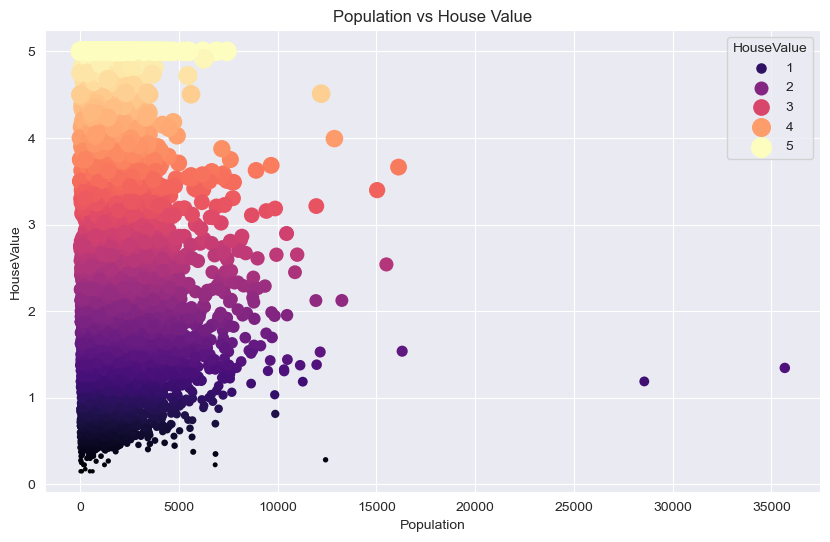

In [78]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='HouseValue', hue='HouseValue', size='HouseValue', sizes=(10, 200), palette='magma', edgecolor='None')
plt.title('Population vs House Value')
plt.show()

What can you conclude from the plot you created?  
**answer:** There does not seem to be a linear relationship between Population and House Value, further most of the data seems to be concentrated between population of 0 and 10000.

Create a scatter plot of Longitude vs. Latitude, and color each point by its corresponding house value (y).

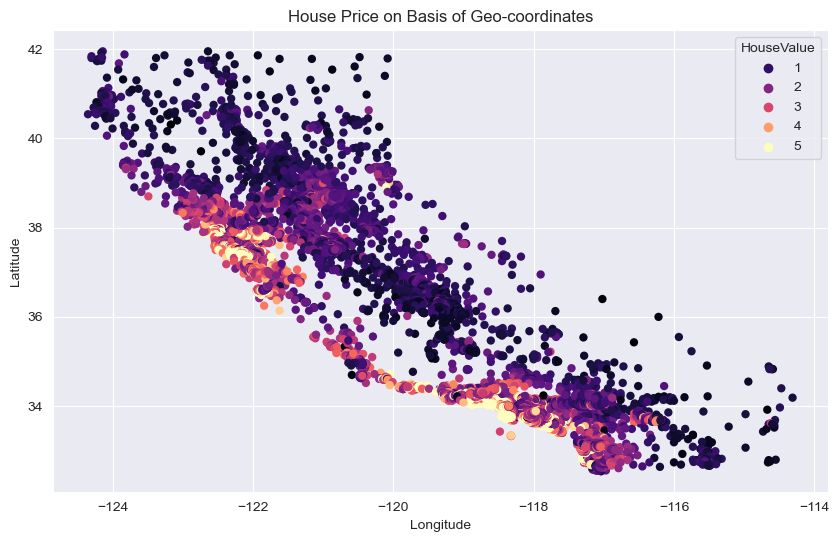

In [79]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='HouseValue', palette='magma', edgecolor='None')
plt.title('House Price on Basis of Geo-coordinates')
plt.show()

What can you conclude from the plot you created?  
**answer:** The plot seems to indicate that houses of longitudes below around -120 and latitudes below about 38 have higher values, while a vast majority of the houses have relatively lower values.

Create a heatmap of the data

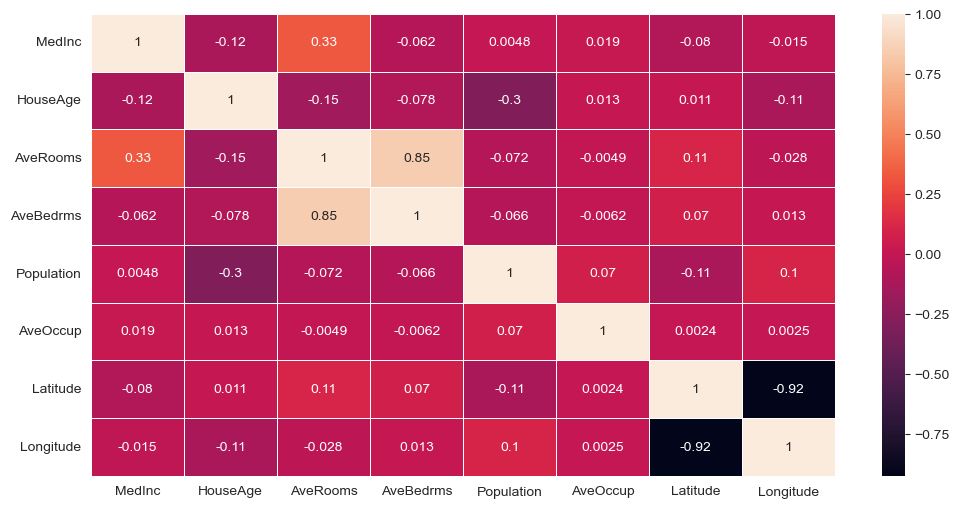

In [101]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), annot=True, linewidth=.5)
plt.show()

What can you conclude from the heatmap you created?  
**answer:** The heatmap indicates that `AveBedrms` and `AveRooms` are highly correlated with each other.

Create the following plots:
1. A scatter plot of MedInc vs. house value (y)
2. A scatter plot of HouseAge vs. house value (y)
3. A scatter plot of AveRooms vs. house value (y)
4. A scatter plot of AveBedrms vs. house value (y)
5. A scatter plot of AveOccup vs. house value (y)

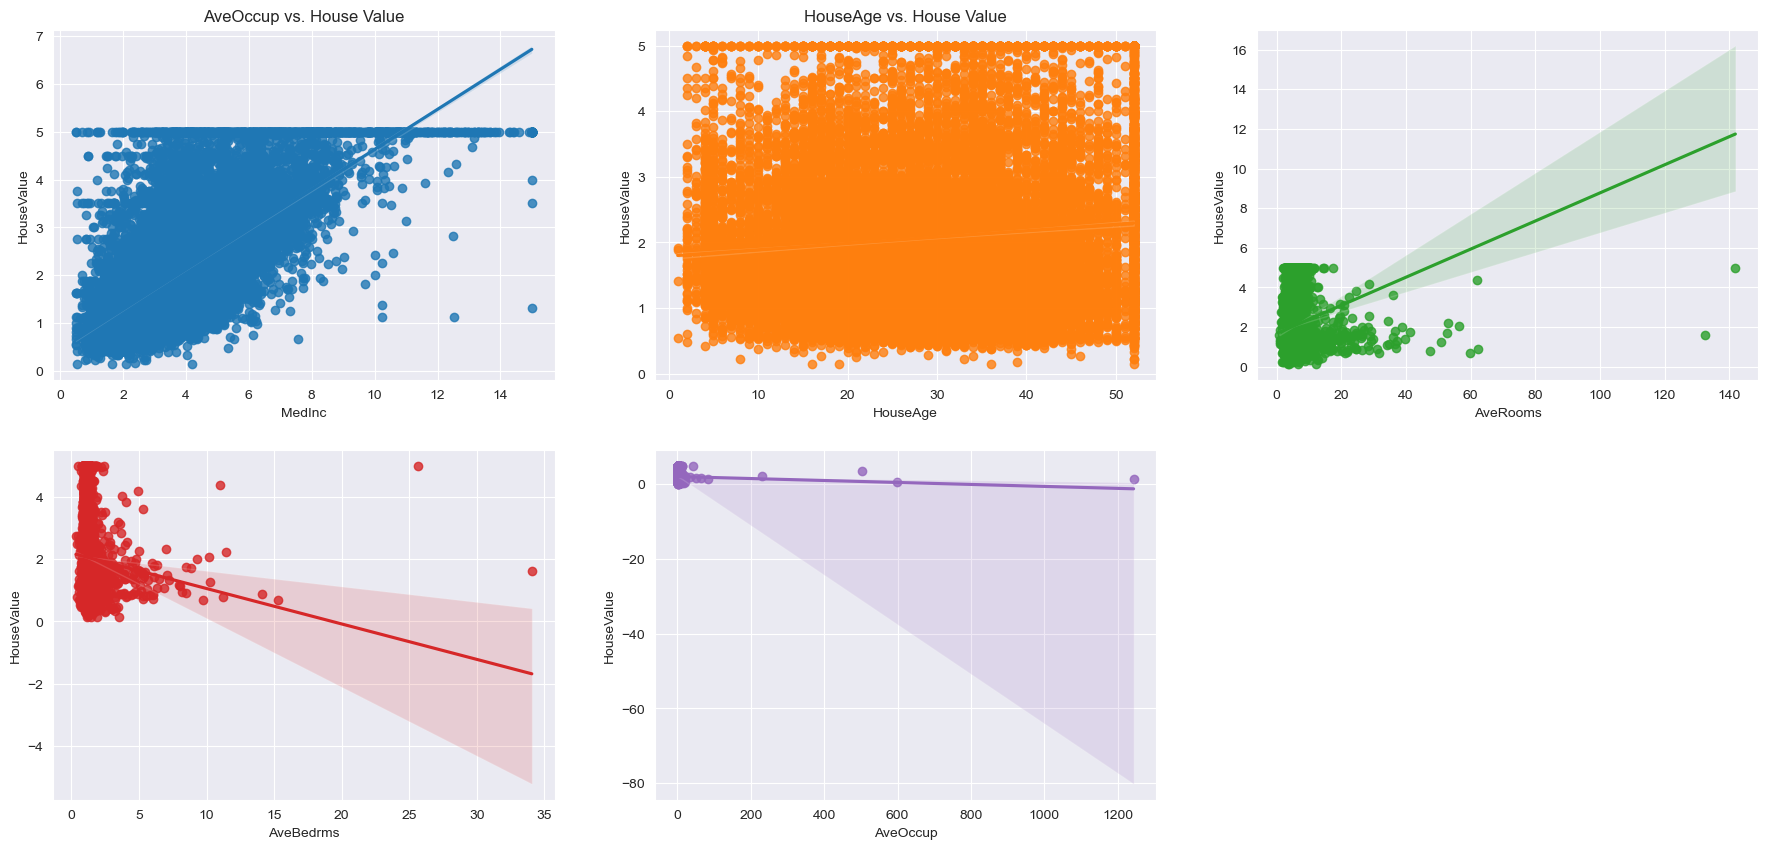

In [113]:
fig, axes = plt.subplots(2, 3, figsize=(22, 10))

sns.regplot(data=df, x='MedInc', y='HouseValue', ax=axes[0, 0])
axes[0, 0].set_title('MedInc vs. House Value')

sns.regplot(data=df, x='HouseAge', y='HouseValue', ax=axes[0, 1], color='tab:orange')
axes[0, 1].set_title('HouseAge vs. House Value')

sns.regplot(data=df, x='AveRooms', y='HouseValue', ax=axes[0, 2], color='tab:green')
axes[0, 0].set_title('AveRooms vs. House Value')

sns.regplot(data=df, x='AveBedrms', y='HouseValue', ax=axes[1, 0], color='tab:red')
axes[0, 0].set_title('AveBedrms vs. House Value')

sns.regplot(data=df, x='AveOccup', y='HouseValue', ax=axes[1, 1], color='tab:purple')
axes[0, 0].set_title('AveOccup vs. House Value')


fig.delaxes(axes[1, 2])
plt.show()

What can you conclude from the plots you created?  
**answer:** The scatterplots show that only `AveOccup` could have a somewhat weak positive linear relationship with House Value while none of the other features indicate the presence of any form linear relationship with House Value.

Create a histogram for HouseAge.

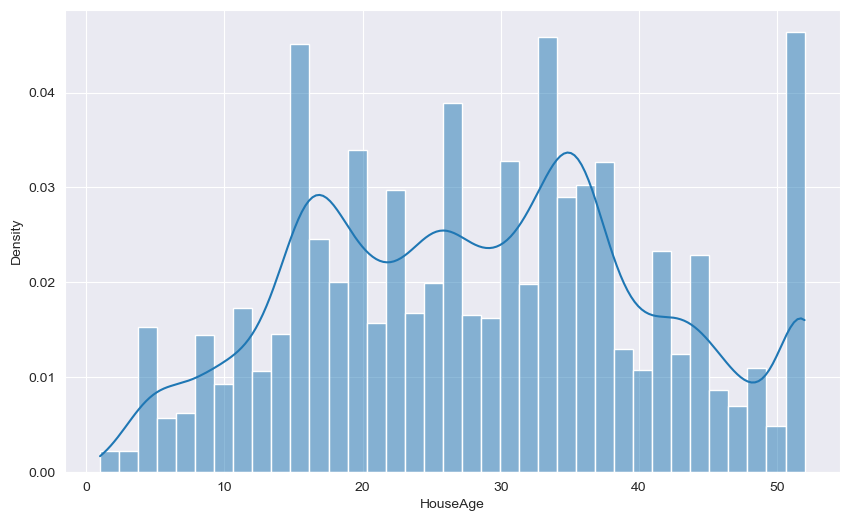

In [119]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=X, x='HouseAge', stat="density", kde=True)
plt.show()

What can you conclude from the plot you created?  
**answer:** The data does not seem very skewed in either direction, certain house ages (between 10 and 20, between 30 and 40, and after 50) could potentially be extreme values.

### Part 3 Model Creation and Evaluation
Perform the following:
1. Scale the data
2. Split your data into a training and testing set, with test size of 0.30
3. Create a neural network for regression using sklearn. See `sklearn.neural_network.MLPRegressor` if you need help. Use a hidden layers of size 130 -> 64 -> 32 -> 16, and activation function 'relu'
4. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
5. Print the $R^2$ of your model.

##### Original MLP model

In [3]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [4]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)

In [9]:
# creating neural network
from sklearn.neural_network import MLPRegressor

mlp_regr = MLPRegressor(random_state=1, hidden_layer_sizes=(130, 64, 32, 16), activation='relu')
mlp_regr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(130, 64, 32, 16), random_state=1)

In [10]:
# running model on test data and printing R squared
from sklearn.metrics import r2_score

predictions = mlp_regr.predict(X_test)
r2 = r2_score(y_test, predictions)

print(f'R_squared score for neural network model: {r2}')

R_squared score for neural network model: 0.7898737669517093


##### MLP Model With Different Hidden Layer Sizes

In [16]:
import warnings
warnings.filterwarnings("ignore")

mlp_diffSize1 = MLPRegressor(random_state=1, hidden_layer_sizes=(100, 50, 10), activation='relu')
mlp_diffSize1.fit(X_train, y_train)
pred1 = mlp_diffSize1.predict(X_test)
r2_sizes1 = r2_score(y_test, pred1)

print('MLP with hidden layer sizes of 100, 50, 10')
print(f'R_squared score: {r2_sizes1}')

warnings.resetwarnings()

MLP with hidden layer sizes of 100, 50, 10
R_squared score: 0.7941040528025549


In [17]:
warnings.filterwarnings("ignore")

mlp_diffSize2 = MLPRegressor(random_state=1, hidden_layer_sizes=(100,), activation='relu')
mlp_diffSize2.fit(X_train, y_train)
pred2 = mlp_diffSize2.predict(X_test)
r2_sizes2 = r2_score(y_test, pred2)

print('MLP with hidden layer sizes of 100')
print(f'R_squared score: {r2_sizes2}')

warnings.resetwarnings()

MLP with hidden layer sizes of 100
R_squared score: 0.7813552645496059


In [18]:
warnings.filterwarnings("ignore")

mlp_diffSize3 = MLPRegressor(random_state=1, hidden_layer_sizes=(300, 200, 100), activation='relu')
mlp_diffSize3.fit(X_train, y_train)
pred3 = mlp_diffSize3.predict(X_test)
r2_sizes3 = r2_score(y_test, pred3)

print('MLP with hidden layer sizes of 300, 200, 100')
print(f'R_squared score: {r2_sizes3}')

warnings.resetwarnings()

MLP with hidden layer sizes of 300, 200, 100
R_squared score: 0.7703479808272261


##### `GridSearchCV` Model

In [11]:
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

params = {
    'hidden_layer_sizes': [(100), (50, 100, 50), (25, 50, 100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001]
}

mlp_model = MLPRegressor(max_iter=1000)
grid_search = GridSearchCV(mlp_model, params)

grid_search.fit(X_train, y_train)
warnings.resetwarnings()

In [12]:
grid_search.best_params_

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (25, 50, 100)}

In [14]:
warnings.filterwarnings("ignore")

best_params_mlp = MLPRegressor(max_iter=1000, hidden_layer_sizes=(25, 50, 100), activation='tanh', alpha=0.001)
best_params_mlp.fit(X_train, y_train)
preds_best_params = best_params_mlp.predict(X_test)
r2_best = r2_score(y_test, preds_best_params)

print(f'R_squared score: {r2_best}')
warnings.resetwarnings()

R_squared score: 0.8020129594094975


##### MLP Model Without Outliers

In [5]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=y.columns)

scaled_df = pd.concat([X_scaled_df, y_scaled_df], axis=1)

In [6]:
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


filtering out outliers using the interquartile range

In [57]:
Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)

outliers = ((scaled_df < lower_limit) | (scaled_df > upper_limit)).any(axis=1)

scaled_no_outliers_df = scaled_df[outliers == False]
scaled_no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16312 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      16312 non-null  float64
 1   HouseAge    16312 non-null  float64
 2   AveRooms    16312 non-null  float64
 3   AveBedrms   16312 non-null  float64
 4   Population  16312 non-null  float64
 5   AveOccup    16312 non-null  float64
 6   Latitude    16312 non-null  float64
 7   Longitude   16312 non-null  float64
 8   HouseValue  16312 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [61]:
X_no_outliers = scaled_no_outliers_df.drop(columns=['HouseValue'])
y_no_outliers = scaled_no_outliers_df['HouseValue']

X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.30, random_state=42)

In [66]:
mlp_no_outliers = MLPRegressor(random_state=1, hidden_layer_sizes=(25, 50, 100), activation='tanh', alpha=0.001)
mlp_no_outliers.fit(X_no_train, y_no_train)

c:\Users\joshi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(25, 50, 100),
             random_state=1)

In [68]:
pred_no_outliers = mlp_no_outliers.predict(X_no_test)
r2_no_outliers = r2_score(y_no_test, pred_no_outliers)

print(f'R_squared score for neural network model: {r2_no_outliers}')

R_squared score for neural network model: 0.789421306902362


##### Answer:
- How did your model perform?
   - **answer:** The original model performed well in predicting the house values since its $R^2$ value is about $79\%$.
- Try experimenting with different hidden layer sizes.
- Try using `gridsearchCV` to find the best set of parameters.
- Write the best setting working.
   - **answer:** `{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (25, 50, 100)}`
- Also, hopefully you noticed that our data contains outliers. You can also try removing them to see if that improves performance.
   - **answer:** The outliers were removed from the scaled dataframe using the interquartile range, and the parameters from the grid search were used to train the new MLP model. The $R^2$ score of this model is also about $79\%$, there was not much of a performance improvement from the original model and the score is slightly lower than the grid search best parameters model.

Instruction( for submission): Save any cells you use for experimenting so that we can see what you tried.

### Part 4 Reading and Understanding the Data (Classification part)
- Import Iris dataset
- TODO:
   - Print some basic statistics of your data
   - Print some general information about your data using pandas
   - By looking at our previous output, are there any missing values in this dataset? How do we know?

In [3]:
from sklearn.datasets import load_iris

iris_sk = load_iris()
X_iris = pd.DataFrame(iris_sk.data, columns=iris_sk.feature_names)
y_iris = pd.DataFrame(iris_sk.target, columns=['species'])

In [77]:
X_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
X_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [79]:
y_iris.describe()

,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [80]:
y_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   species  150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


In [81]:
print(f'X (data) has {X_iris.isnull().sum().sum()} missing or null values')
print(f'y (target) has {y_iris.isnull().sum().sum()} missing or null values')

X (data) has 0 missing or null values
y (target) has 0 missing or null values


**answer:** Based on the previous outputs we can conclude that there are no missing values in this dataset based on the outputs of the `info` and `isnull` functions.

- Create a pairplot of the iris data. We'll temporarily add y to our X data frame (name it species) so we can easily access the species type. Just remember to drop the column once you're finished.
- TODO: Create a pairplot of the iris data

c:\Users\Ujwal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


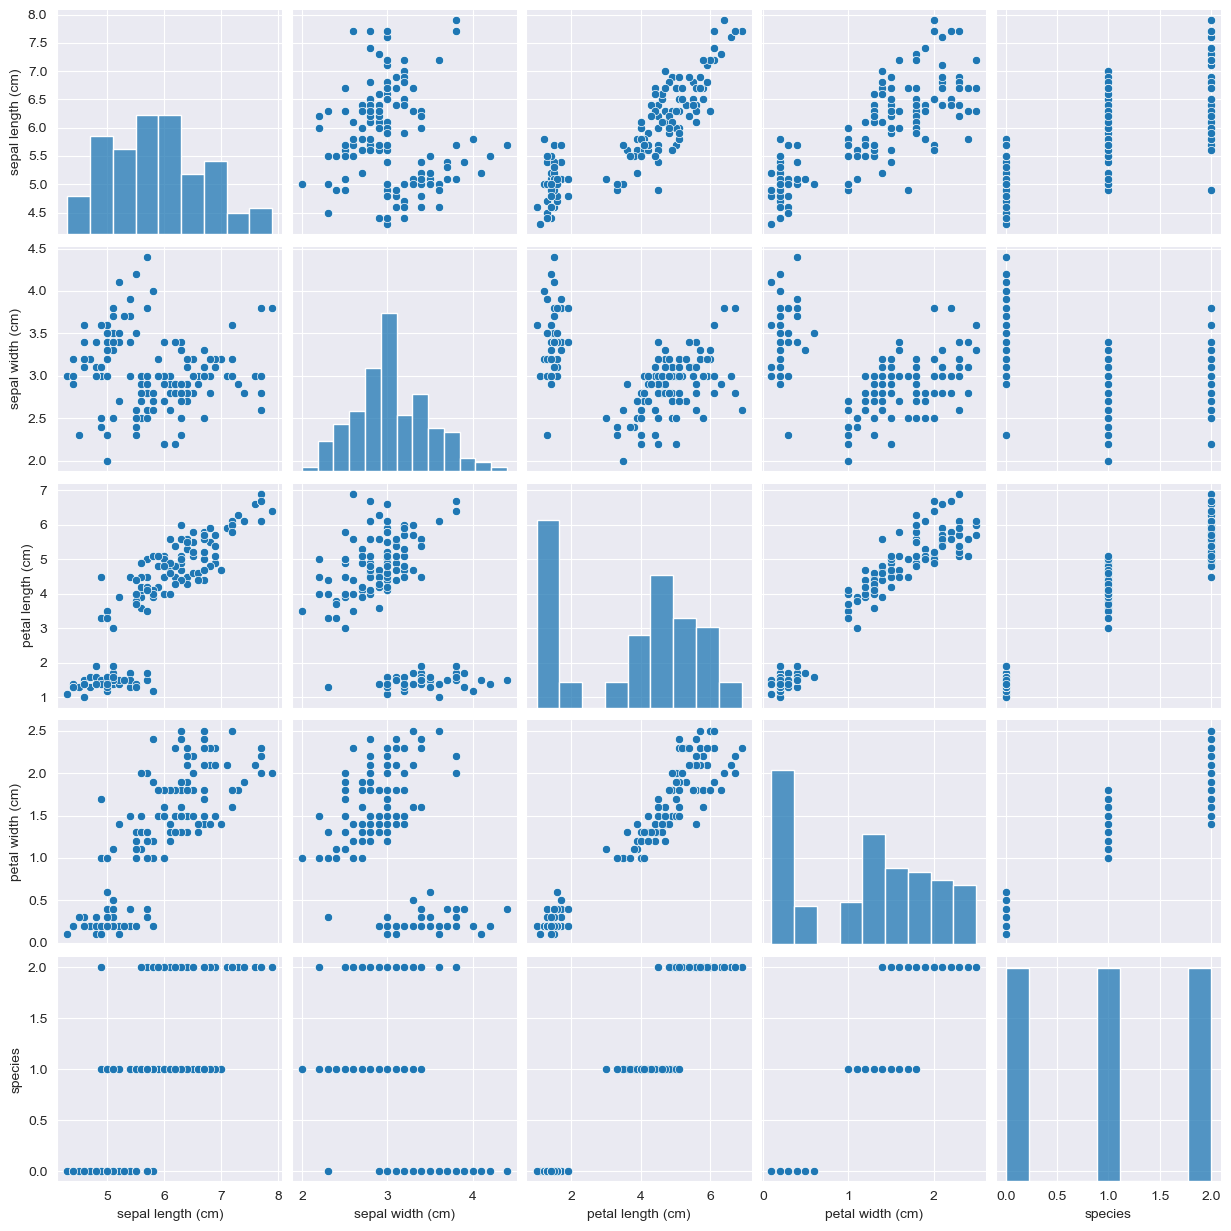

In [5]:
iris_df = pd.concat([X_iris, y_iris], axis=1)
sns.pairplot(iris_df)
plt.show()

What can you conclude from the plot you created?  
**answer:** The pair plots indicate that petal length and petal width may be correlated, further most of the data (aside from the target) seems to not have any significant skew other than petal width and petal length which may have extreme values.

Create the following plot:
- A boxplot of species on the x-axis and sepal length (cm) on the y-axis

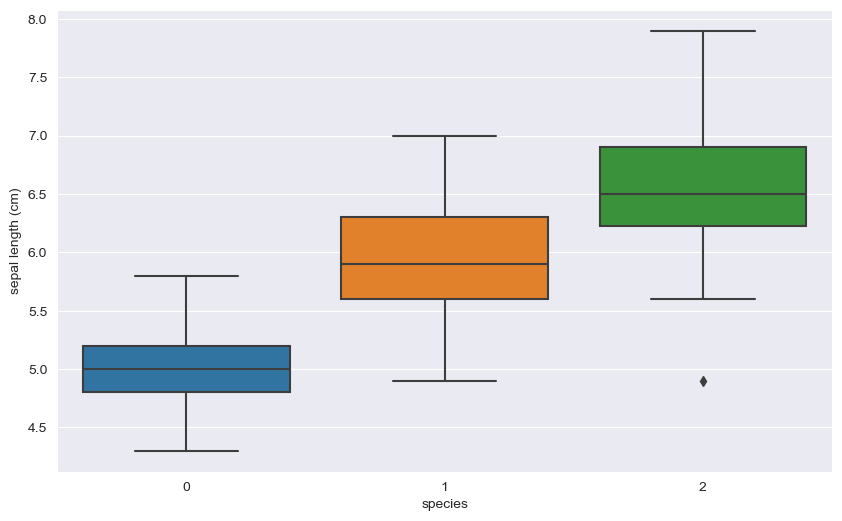

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)')
plt.show()

What can you conclude from the plots you created?  
**answer:** The box plots indicate realtively few outliers (with only one being seen for species 2), and the data does not seem very skewed with the exception that species 2 data may be slightly right skewed.

Create the following plot
- A boxplot of species on the x-axis and sepal width (cm) on the y-axis

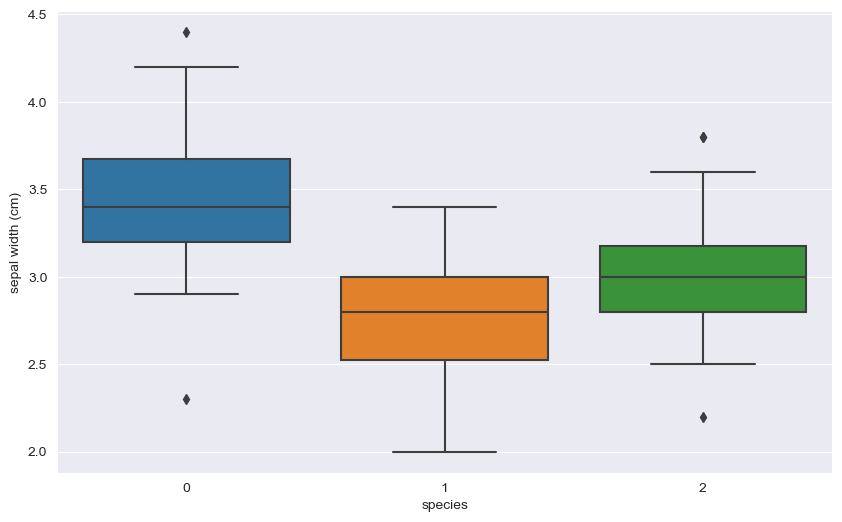

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='sepal width (cm)')
plt.show()

What can you conclude from the plots you created?  
**answer:** Relatively few outliers are present, the data for species 0 is slightly right skewed while the others are slightly left skewed.

Create the following plot
- A boxplot of species on the x-axis and petal length (cm) on the y-axis

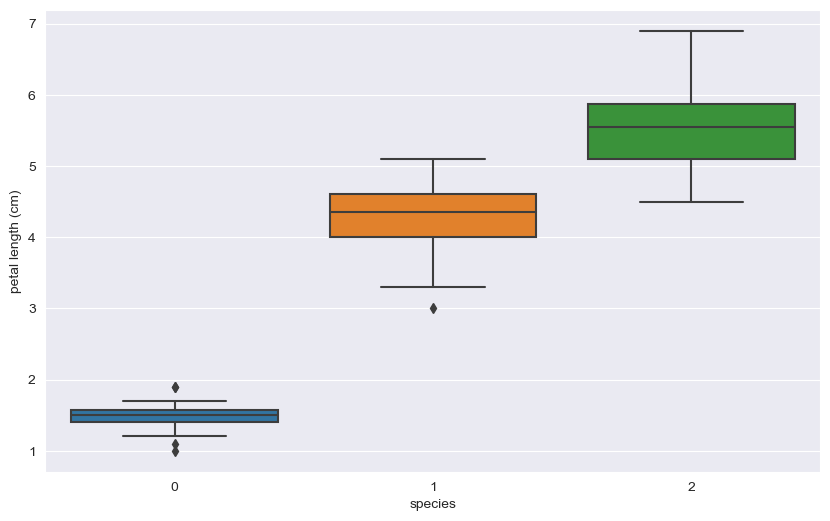

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='petal length (cm)')
plt.show()

What can you conclude from the plots you created?  
**answer:** The range for the data for species 0 is realtoively small with some outliers, the data does seem to be skewed. The data for both species 1 and 2 are slightly right skewed.

Create the following plot
- A boxplot of species on the x-axis and petal width (cm) on the y-axis

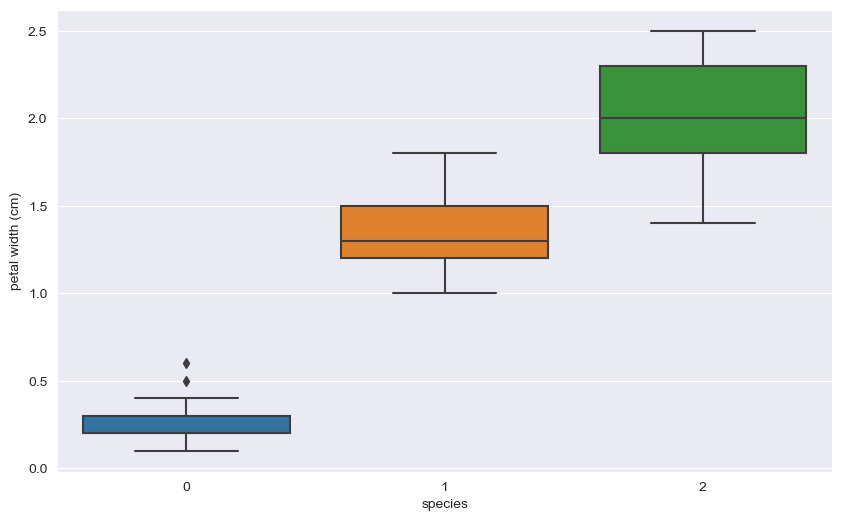

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)')
plt.show()

What can you conclude from the plots you created?  
**answer:** There seems be very few data points for species 0 indicated by the absence of the median line on its plot, the other two species data seem to be skewed to the right.

Create a scatterplot of sepal length (cm) vs. sepal width (cm) and color each point with a unique color according to their species.

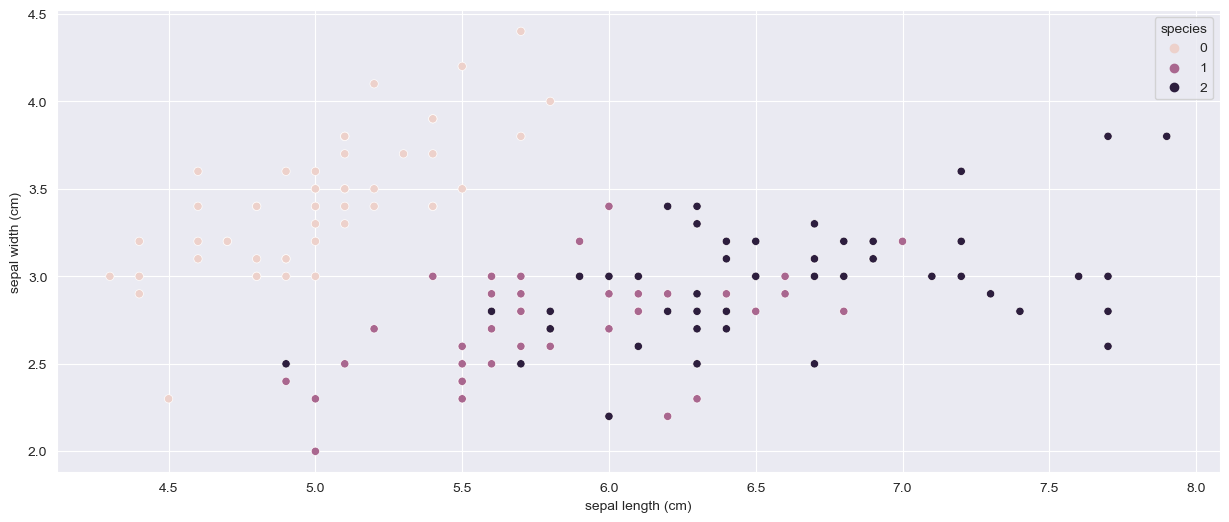

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.show()

What can you conclude from the plots you created?  
**answer:** The data points for species 0 seem to be very well spearated and secluded from the other target outputs, while species 1 & 2 are more mixed together. This may indicate that sepal width and sepal length may play a role in determining wether the species may be categorized as species 0.

### Part 5: Model creation and evaluation
- Remove species column from the dataset
- Perform the following:
   1. Scale the data
   2. Split your data into a training and testing set, with test size of 0.30
   3. Create a neural network for classification using sklearn. See `sklearn.neural_network.MLPClassifier` if you need help. Use a hidden layers of size 256->128->64->32, and activation function 'relu'.
   4. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
   5. Print the mean accuracy of your model on the given test data and labels.

##### Scaling & Splitting The Data

In [58]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)
y_iris_vals = y_iris.values
# y_iris_scaled = scaler.fit_transform(y_iris)

In [60]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_scaled, y_iris_vals, test_size=0.30, random_state=42)

##### Original MLC model

In [61]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, activation='relu', hidden_layer_sizes=(256, 128, 64, 32))
clf.fit(X_iris_train, y_iris_train)


c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), random_state=1)

In [62]:
predictions = clf.predict(X_iris_test)
mean_score = clf.score(X_iris_test, y_iris_test)

print(f'Mean accuracy: {mean_score}')

Mean accuracy: 1.0


##### MLC Model With Different Hidden Layer Sizes

In [63]:
import warnings
warnings.filterwarnings("ignore")

mlc_diffSize1 = MLPClassifier(random_state=1, hidden_layer_sizes=(100, 50, 10), activation='relu')
mlc_diffSize1.fit(X_iris_train, y_iris_train)
score_sizes1 = mlc_diffSize1.score(X_iris_test, y_iris_test)

print('MLP with hidden layer sizes of 100, 50, 10')
print(f'R_squared score: {score_sizes1}')

warnings.resetwarnings()

MLP with hidden layer sizes of 100, 50, 10
R_squared score: 1.0


In [64]:
warnings.filterwarnings("ignore")

mlc_diffSize2 = MLPClassifier(random_state=1, hidden_layer_sizes=(100,), activation='relu')
mlc_diffSize2.fit(X_iris_train, y_iris_train)
score_sizes2 = mlc_diffSize2.score(X_iris_test, y_iris_test)

print('MLP with hidden layer size of 100')
print(f'R_squared score: {score_sizes2}')

warnings.resetwarnings()

MLP with hidden layer size of 100
R_squared score: 1.0


In [65]:
warnings.filterwarnings("ignore")

mlc_diffSize3 = MLPClassifier(random_state=1, hidden_layer_sizes=(300, 200, 100), activation='relu')
mlc_diffSize3.fit(X_iris_train, y_iris_train)
score_sizes3 = mlc_diffSize3.score(X_iris_test, y_iris_test)

print('MLP with hidden layer sizes of 300, 200, 100')
print(f'R_squared score: {score_sizes3}')

warnings.resetwarnings()

MLP with hidden layer sizes of 300, 200, 100
R_squared score: 1.0


##### `GridSearchCV` Model

In [73]:
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

params_grid = {
    'hidden_layer_sizes': [(100, 150, 200), (50, 100, 50), (25, 50, 100)],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001]
}

mlc_model = MLPClassifier(max_iter=1000)
grid_search_mlc = GridSearchCV(mlc_model, params_grid)

grid_search_mlc.fit(X_iris_train, y_iris_train)
warnings.resetwarnings()

In [74]:
grid_search_mlc.best_params_

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 150, 200)}

In [75]:
warnings.filterwarnings("ignore")

best_params_mlc = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 150, 200), activation='tanh', alpha=0.0001)
best_params_mlc.fit(X_iris_train, y_iris_train)

print(f'mean accuracy score: {best_params_mlc.score(X_iris_test, y_iris_test)}')
warnings.resetwarnings()

mean accuracy score: 1.0


##### Answer:
- How did your model perform?
   - **answer:** The mean accuracy of this model is 1, it was able to predict everything perfectly.
- Try experimenting with different hidden layer sizes.
- Try using gridsearchCV to find the best set of parameters.
- Save any cells you use for experimenting so that we can see what you tried.
- What works best for this model?
   - **answer:** `{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 150, 200)}`

##### Create a confusion matrix of the results.

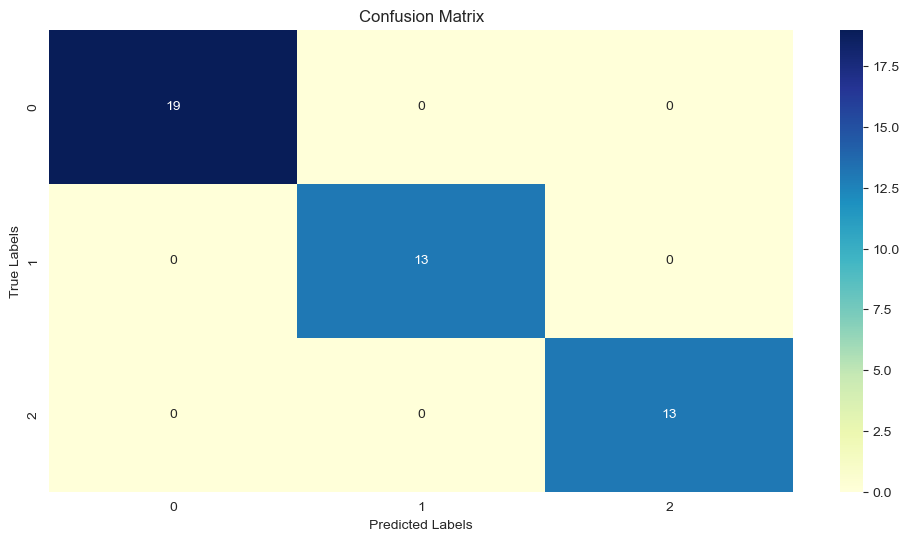

In [76]:
from sklearn.metrics import confusion_matrix

preds_best = best_params_mlc.predict(X_iris_test)
conf_matrix = confusion_matrix(y_iris_test, preds_best)

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()